# Introduction

In this notebook, we tackle a time series forecasting problem using historical weather data. The objective is to predict future weather conditions based on past observations. We will explore and compare different models, including LSTM, GRU, tuned LSTM, and bidirectional LSTM, to determine which model performs the best for this forecasting task.


In [1]:
pip install tensorflow-cpu --timeout=120


Note: you may need to restart the kernel to use updated packages.


## Loading the Data

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


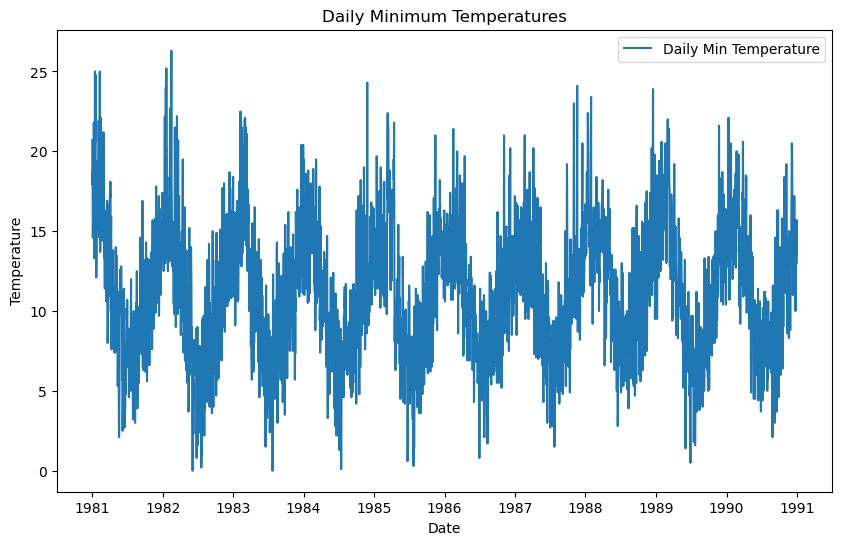

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display first few rows
print(df.head())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Temp'], label='Daily Min Temperature')
plt.title('Daily Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


## Data Preprocessing

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Temp']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length (e.g., 30 days of data to predict the next day)
SEQ_LENGTH = 30
X, y = create_sequences(df_scaled, SEQ_LENGTH)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input for LSTM/GRU (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## Modeling

C:\Users\SIVUYILE\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 0.0434 - val_loss: 0.0103
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0141 - val_loss: 0.0104
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - val_loss: 0.0098
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0138 - val_loss: 0.0096
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - val_loss: 0.0094
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0130 - val_loss: 0.0094
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0124 - val_loss: 0.0092
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0122 - val_loss: 0.0093
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - val_loss: 0.0090
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - val_loss: 0.0089
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.

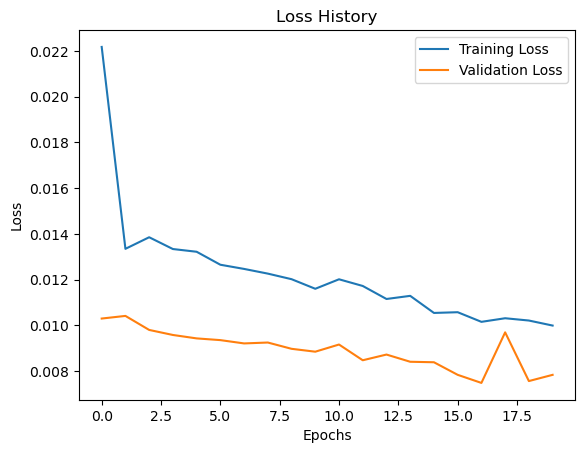

In [4]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


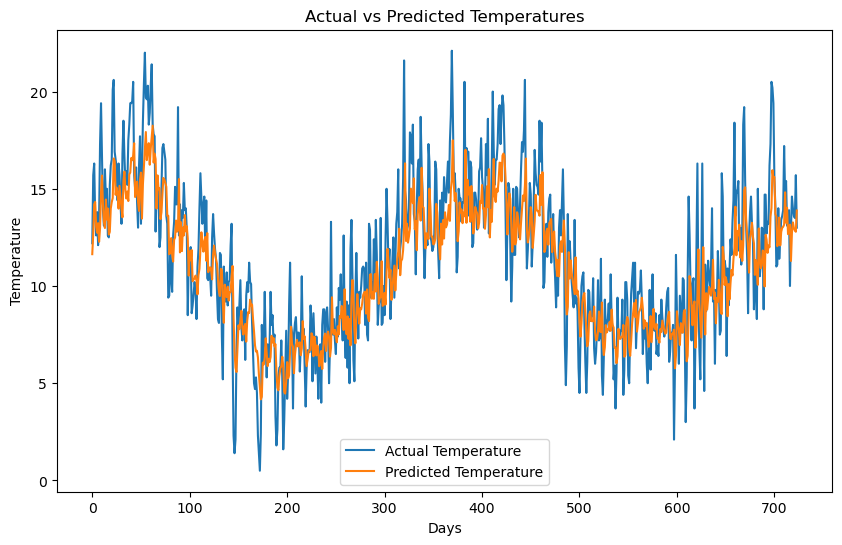

In [5]:
# Make predictions
predicted = model.predict(X_test)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Temperature')
plt.plot(predicted, label='Predicted Temperature')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_actual, predicted)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 5.424776796246973
RMSE: 2.3291150242628578


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0444 - val_loss: 0.0110
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0139 - val_loss: 0.0100
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0130 - val_loss: 0.0098
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0130 - val_loss: 0.0096
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0124 - val_loss: 0.0093
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0131 - val_loss: 0.0096
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0121 - val_loss: 0.0092
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0123 - val_loss: 0.0090
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0114 - val_loss: 0.0089
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0122 - val_loss: 0.0087
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.

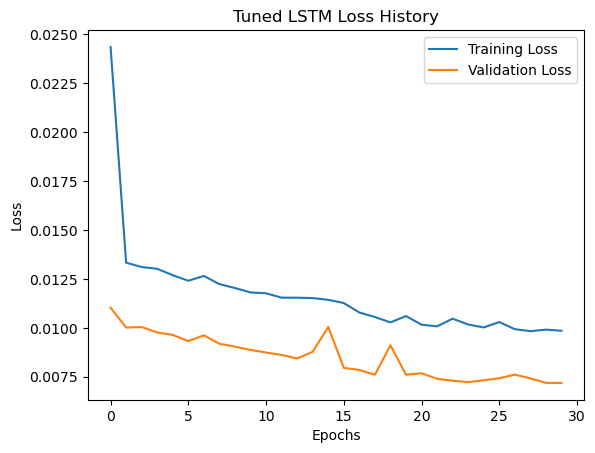

In [15]:
# Build a tuned LSTM model
model_tuned = Sequential()
model_tuned.add(LSTM(units=100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))  # Increased units
model_tuned.add(Dropout(0.3))  # Increased dropout
model_tuned.add(LSTM(units=100, return_sequences=False))
model_tuned.add(Dropout(0.3))
model_tuned.add(Dense(units=1))

# Compile with a reduced learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Adjusted learning rate
model_tuned.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history_tuned = model_tuned.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))  # Increased epochs and batch size

# Plot training history
plt.plot(history_tuned.history['loss'], label='Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Tuned LSTM Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 0.0468 - val_loss: 0.0093
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0134 - val_loss: 0.0088
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - val_loss: 0.0088
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0117 - val_loss: 0.0082
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - val_loss: 0.0078
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0108 - val_loss: 0.0075
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0098 - val_loss: 0.0072
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0100 - val_loss: 0.0079
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0100 - val_loss: 0.0073
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0102 - val_loss: 0.0076
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.

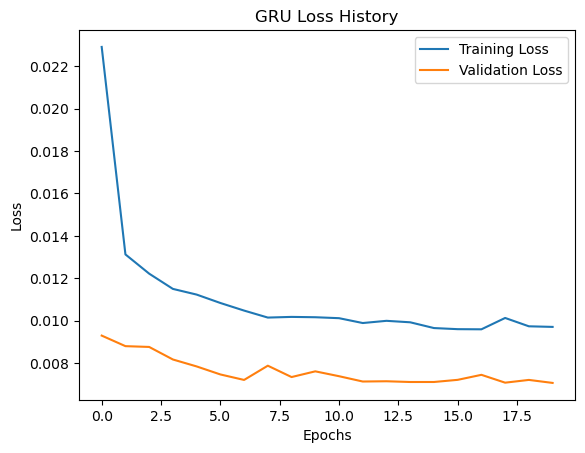

In [17]:
# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0486 - val_loss: 0.0102
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0141 - val_loss: 0.0098
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0127 - val_loss: 0.0097
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0130 - val_loss: 0.0101
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0143 - val_loss: 0.0115
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0133 - val_loss: 0.0094
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0130 - val_loss: 0.0093
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0118 - val_loss: 0.0092
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0122 - val_loss: 0.0092
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0120 - val_loss: 0.0095
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.

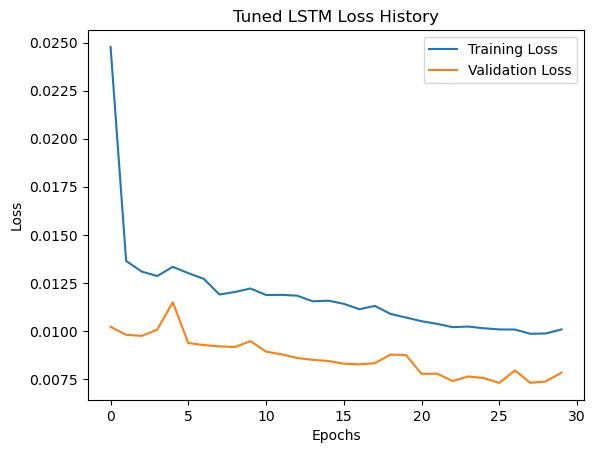

In [19]:
# Build a tuned LSTM model
model_tuned = Sequential()
model_tuned.add(LSTM(units=100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))  # Increased units
model_tuned.add(Dropout(0.3))  # Increased dropout
model_tuned.add(LSTM(units=100, return_sequences=False))
model_tuned.add(Dropout(0.3))
model_tuned.add(Dense(units=1))

# Compile with a reduced learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Adjusted learning rate
model_tuned.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history_tuned = model_tuned.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))  # Increased epochs and batch size

# Plot training history
plt.plot(history_tuned.history['loss'], label='Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Tuned LSTM Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# Try a different sequence length
SEQ_LENGTH = 50  # Change sequence length

# Recreate sequences
X, y = create_sequences(df_scaled, SEQ_LENGTH)

# Split the data again
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


C:\Users\SIVUYILE\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - loss: 0.0360 - val_loss: 0.0105
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0136 - val_loss: 0.0094
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0115 - val_loss: 0.0087
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0115 - val_loss: 0.0085
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0109 - val_loss: 0.0085
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0108 - val_loss: 0.0081
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0112 - val_loss: 0.0080
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0101 - val_loss: 0.0086
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.

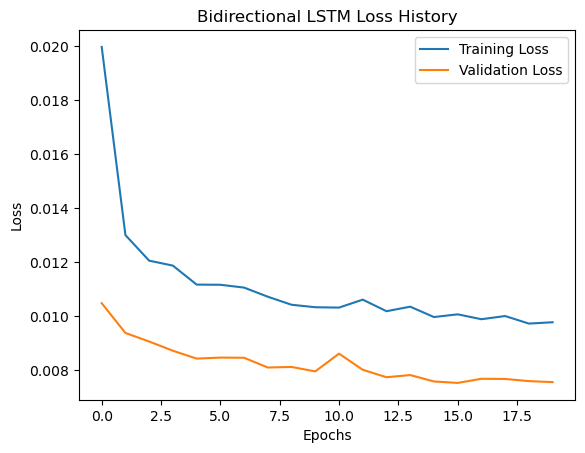

In [25]:
from tensorflow.keras.layers import Bidirectional

# Build a bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(SEQ_LENGTH, 1)))
model_bi_lstm.add(Dropout(0.2))
model_bi_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model_bi_lstm.add(Dropout(0.2))
model_bi_lstm.add(Dense(units=1))

# Compile the model
model_bi_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history_bi_lstm.history['loss'], label='Training Loss')
plt.plot(history_bi_lstm.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation

After training the models, we evaluate their performance using the test dataset. The evaluation metrics used are:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: Provides the square root of the MSE, offering a more interpretable error measure.
- **R-squared (R²)**: Indicates the proportion of variance explained by the model.

We compare these metrics across all models to identify the best-performing one.


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models and return MSE, RMSE, and R²
def evaluate_model(model, X_test, y_test, scaler):
    predicted = model.predict(X_test)
    predicted = scaler.inverse_transform(predicted)  # Inverse scaling
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    mse = mean_squared_error(y_test_actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_actual, predicted)
    
    return mse, rmse, r2

# Evaluate LSTM model
mse_lstm, rmse_lstm, r2_lstm = evaluate_model(model, X_test, y_test, scaler)
print(f'LSTM Model -> MSE: {mse_lstm}, RMSE: {rmse_lstm}, R²: {r2_lstm}')

# Evaluate GRU model
mse_gru, rmse_gru, r2_gru = evaluate_model(model_gru, X_test, y_test, scaler)
print(f'GRU Model -> MSE: {mse_gru}, RMSE: {rmse_gru}, R²: {r2_gru}')

# Evaluate tuned LSTM model
mse_tuned_lstm, rmse_tuned_lstm, r2_tuned_lstm = evaluate_model(model_tuned, X_test, y_test, scaler)
print(f'Tuned LSTM Model -> MSE: {mse_tuned_lstm}, RMSE: {rmse_tuned_lstm}, R²: {r2_tuned_lstm}')

# Evaluate bidirectional LSTM model
mse_bi_lstm, rmse_bi_lstm, r2_bi_lstm = evaluate_model(model_bi_lstm, X_test, y_test, scaler)
print(f'Bidirectional LSTM Model -> MSE: {mse_bi_lstm}, RMSE: {rmse_bi_lstm}, R²: {r2_bi_lstm}')

# Summarize results for comparison
results = {
    'Model': ['LSTM', 'GRU', 'Tuned LSTM', 'Bidirectional LSTM'],
    'MSE': [mse_lstm, mse_gru, mse_tuned_lstm, mse_bi_lstm],
    'RMSE': [rmse_lstm, rmse_gru, rmse_tuned_lstm, rmse_bi_lstm],
    'R²': [r2_lstm, r2_gru, r2_tuned_lstm, r2_bi_lstm]
}

results_df = pd.DataFrame(results)

print("\nModel Evaluation Results:")
print(results_df)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM Model -> MSE: 5.423906794137094, RMSE: 2.328928250104991, R²: 0.6778210894260328
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU Model -> MSE: 4.885905324924791, RMSE: 2.21040840681644, R²: 0.7097782623305111
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Tuned LSTM Model -> MSE: 5.422102799957499, RMSE: 2.328540916530671, R²: 0.6779282462968131
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Bidirectional LSTM Model -> MSE: 5.226608320804737, RMSE: 2.2861776660628843, R²: 0.6895405768008593

Model Evaluation Results:
                Model       MSE      RMSE        R²
0                LSTM  5.423907  2.328928  0.677821
1                 GRU  4.885905  2.210408  0.709778
2          Tuned LSTM  5.422103  2.328541  0.677928
3  Bidirectional LSTM  5.226608  2.286178  0.689541


Conclusion:

    The GRU model has the lowest MSE and RMSE values and the highest R² value among all models.

Given these results, GRU is indeed the best-performing model based on your metrics. It achieves the lowest error rates and explains the highest proportion of variance in the data.